<a href="https://colab.research.google.com/github/Existanze54/sirius-neural-networks-2024/blob/main/Practices/S11_AutoML_LLM/0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Existanze54/sirius-neural-networks-2024/main/Datasets/patient-survival-prediction/data.csv')
print(data.shape)
data.head()

(64199, 86)


,Unnamed: 0,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,82707,36751,69039,158,66.0,35.693127,0,Caucasian,F,152.4,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
1,80002,68336,127397,47,48.0,18.966902,0,African American,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,1
2,54817,71682,77670,27,76.0,19.278960,0,Caucasian,M,173.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
3,44799,114267,19566,100,43.0,45.617284,0,Caucasian,M,180.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Genitourinary,Renal/Genitourinary,NaN,0
4,50277,128055,104990,189,86.0,26.756678,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64199 entries, 0 to 64198
Data columns (total 86 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     64199 non-null  int64  
 1   encounter_id                   64199 non-null  int64  
 2   patient_id                     64199 non-null  int64  
 3   hospital_id                    64199 non-null  int64  
 4   age                            61206 non-null  float64
 5   bmi                            61844 non-null  float64
 6   elective_surgery               64199 non-null  int64  
 7   ethnicity                      63229 non-null  object 
 8   gender                         64185 non-null  object 
 9   height                         63293 non-null  float64
 10  icu_admit_source               64117 non-null  object 
 11  icu_id                         64199 non-null  int64  
 12  icu_stay_type                  64199 non-null 

In [ ]:
data.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max

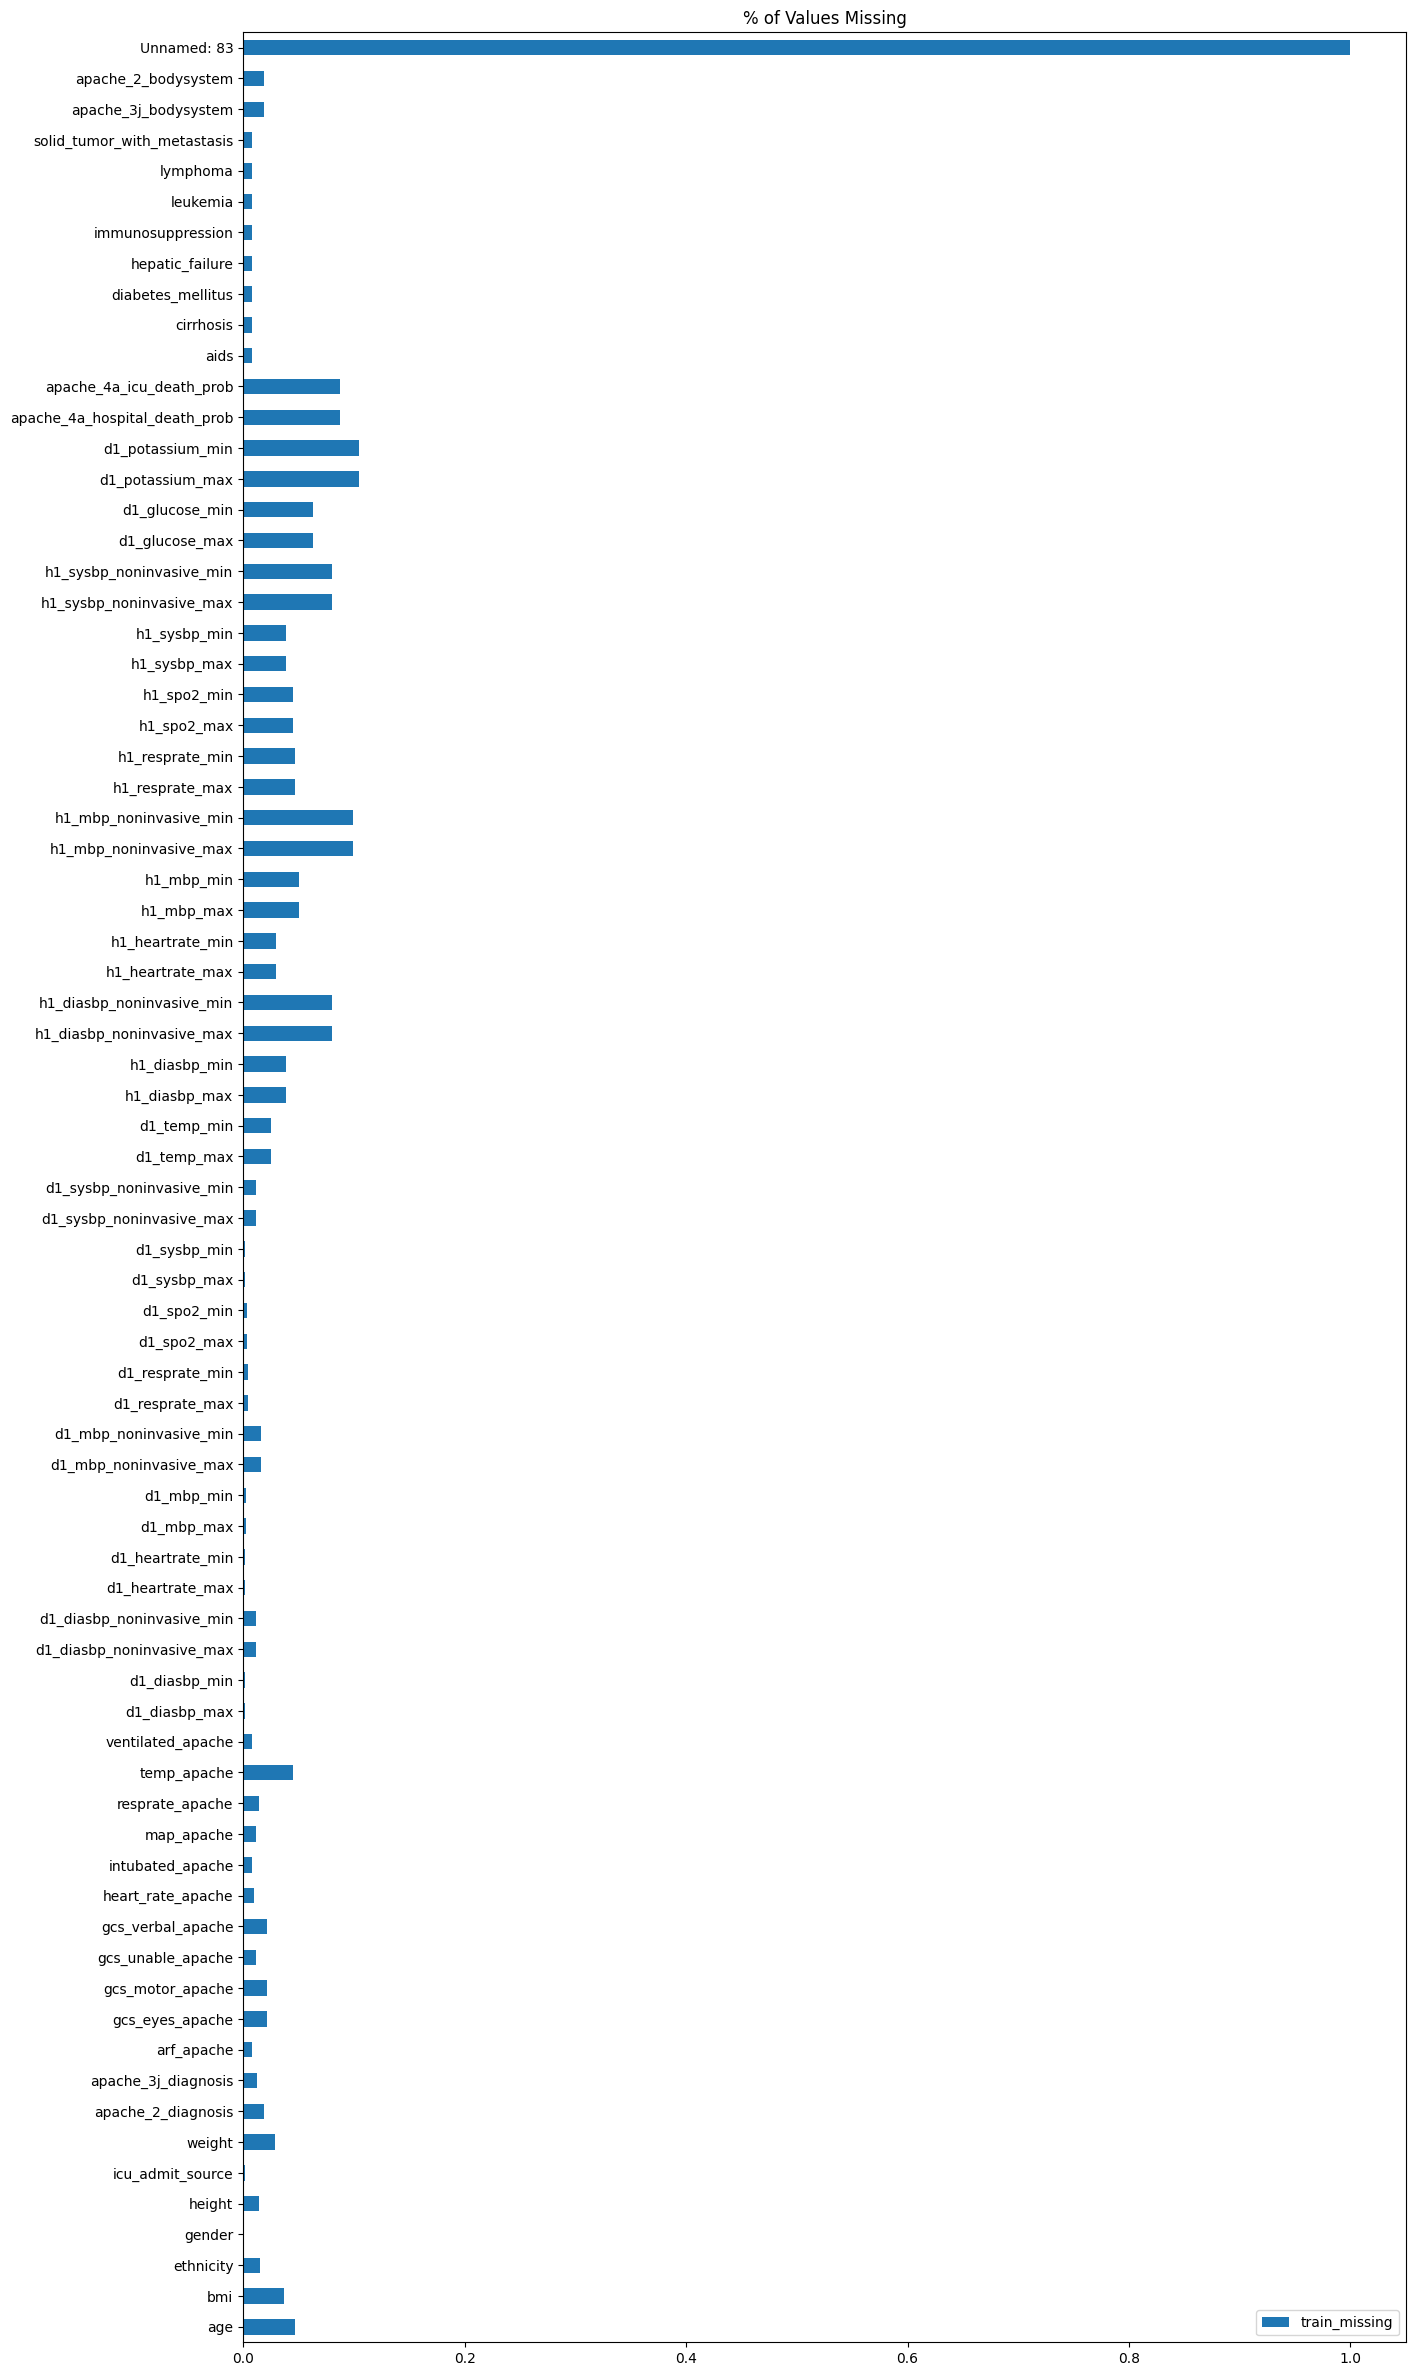

In [ ]:
count_missing = pd.DataFrame([data.isna().mean()]).T
count_missing = count_missing.rename(columns={0: "train_missing"})

count_missing.query("train_missing > 0").plot(kind="barh", figsize=(15, 30), title="% of Values Missing")
plt.show()

Observations

* Unnamed:83 has only NA values, we can drop it.

* We would use KNN imputer for the rest of the data.

In [ ]:
data.drop(columns = ['encounter_id', 'patient_id', 'Unnamed: 0', 'Unnamed: 83'], inplace = True)

In [ ]:
data.isnull().any()

hospital_id                    False
age                             True
bmi                             True
elective_surgery               False
ethnicity                       True
                               ...  
lymphoma                        True
solid_tumor_with_metastasis     True
apache_3j_bodysystem            True
apache_2_bodysystem             True
hospital_death                 False
Length: 82, dtype: bool

In [ ]:
# слишком много данных потеряем если удалять строки с NaN
print(data.dropna().shape)

(39812, 82)


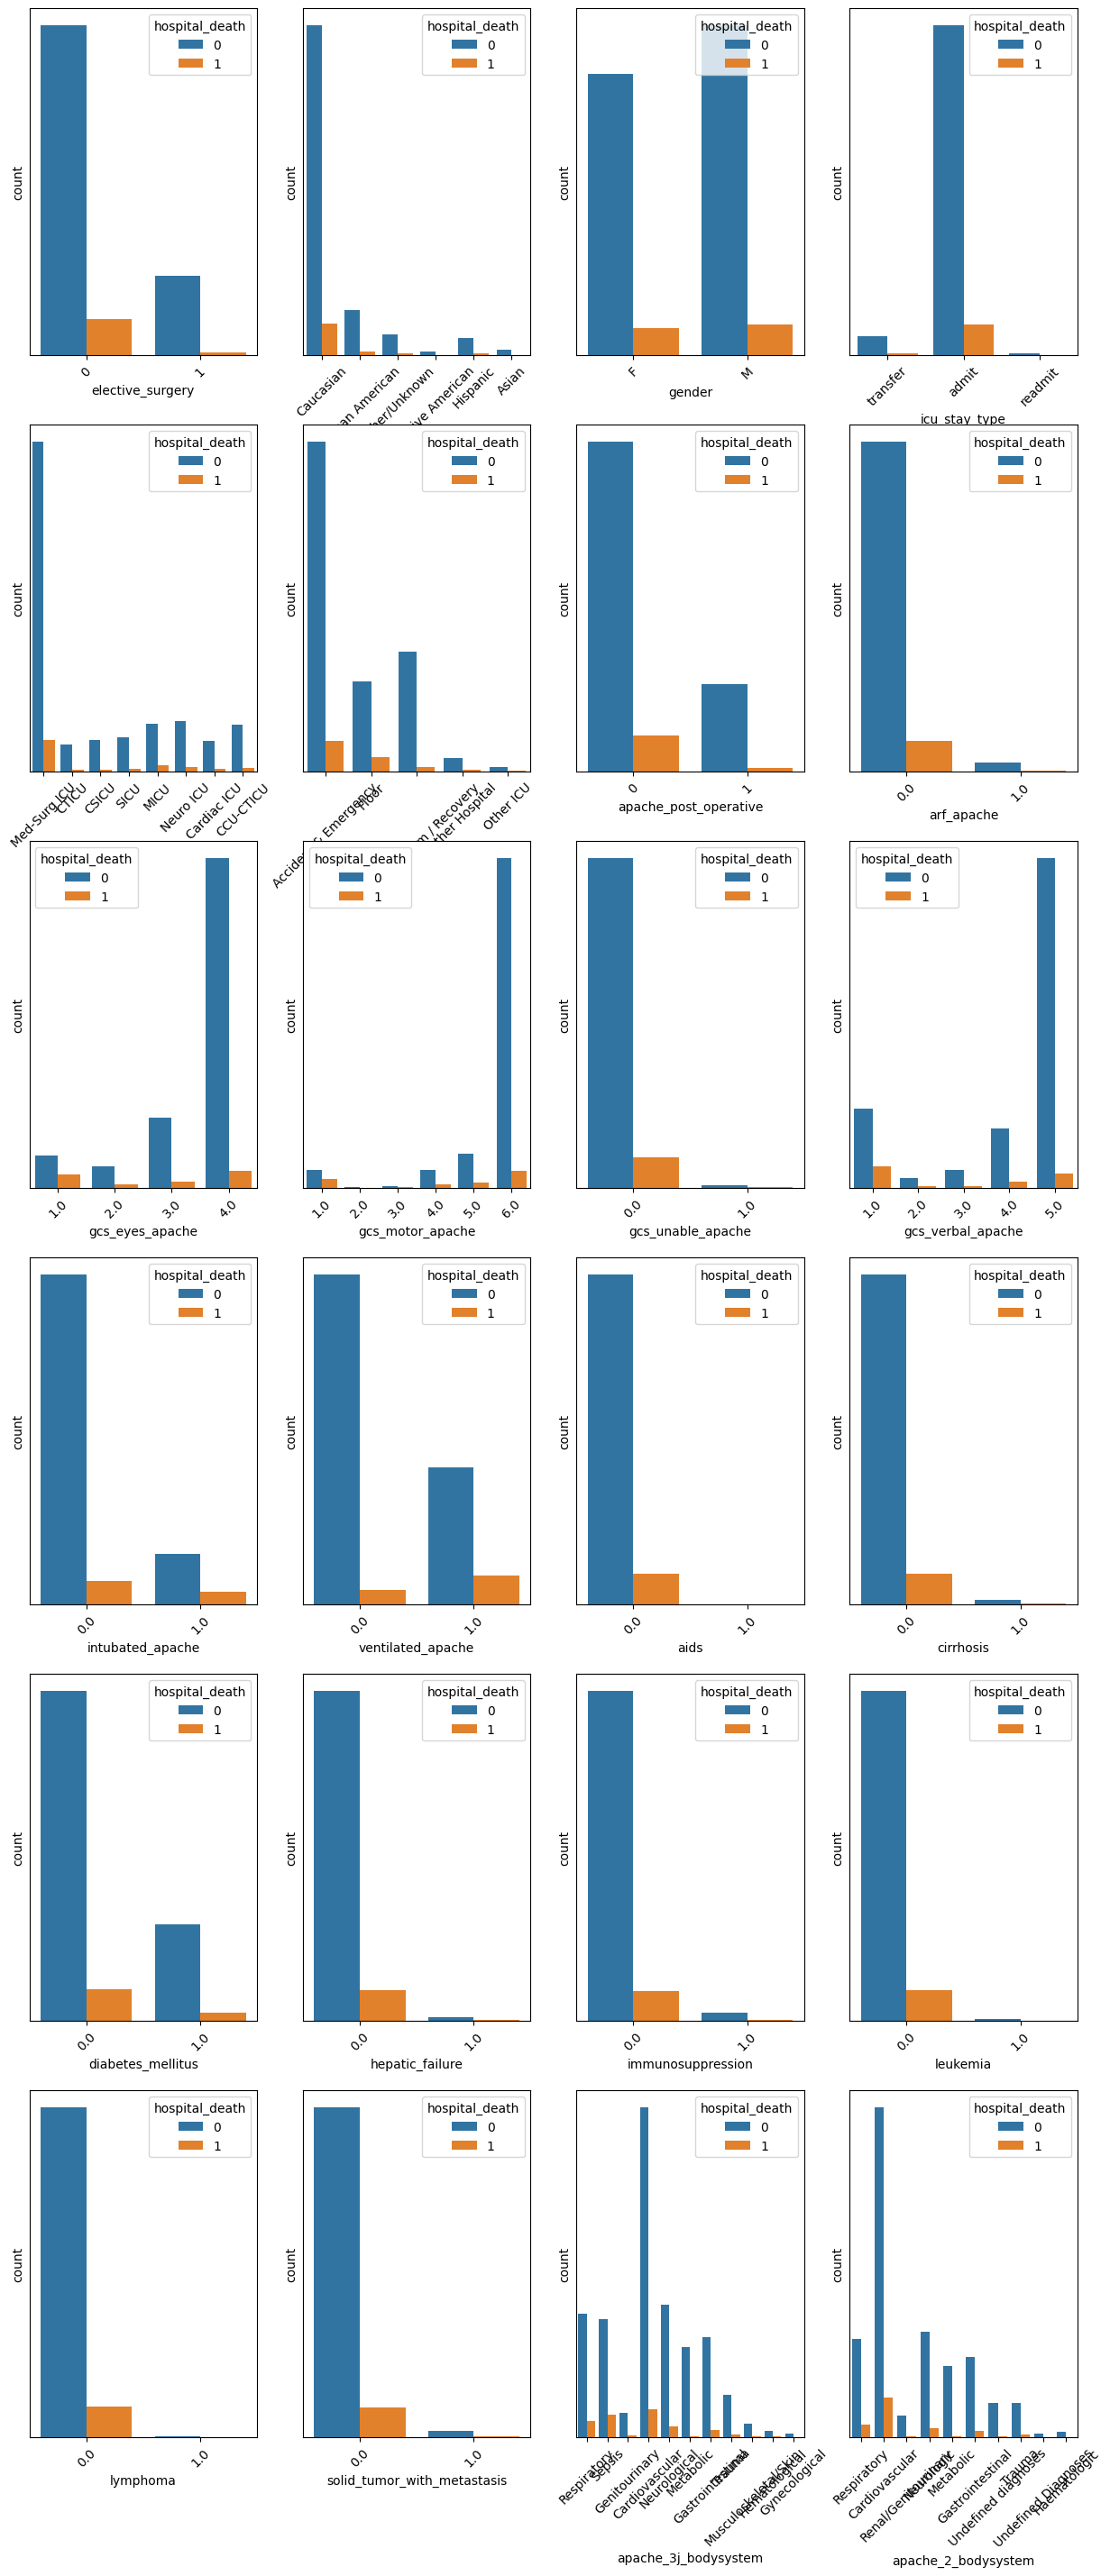

In [ ]:
categorical_columns = ['elective_surgery', 'ethnicity', 'gender','icu_stay_type', \
                       'icu_type','icu_admit_source', 'apache_post_operative', \
                       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', \
                       'gcs_unable_apache', 'gcs_verbal_apache', \
                       'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', \
                       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', \
                       'solid_tumor_with_metastasis', 'apache_3j_bodysystem', \
                       'apache_2_bodysystem']
i = 1
plt.figure(figsize=(15,35))

for columns in categorical_columns:
    plt.subplot(6,4,i)
    sns.countplot(x=columns,hue="hospital_death",data=data)
    plt.xticks(rotation=45)
    plt.yticks([])
    i+=1

Observations:

* Patients with gcs_verbal_apache score of 1 have the most number of deaths even though the proportion of people with a score of 1 is much lesser than people with score of 6 on the same test.

* Major Cause of death according to the apache_3j_bodysystem test is CardioVascular followed by Sepsis

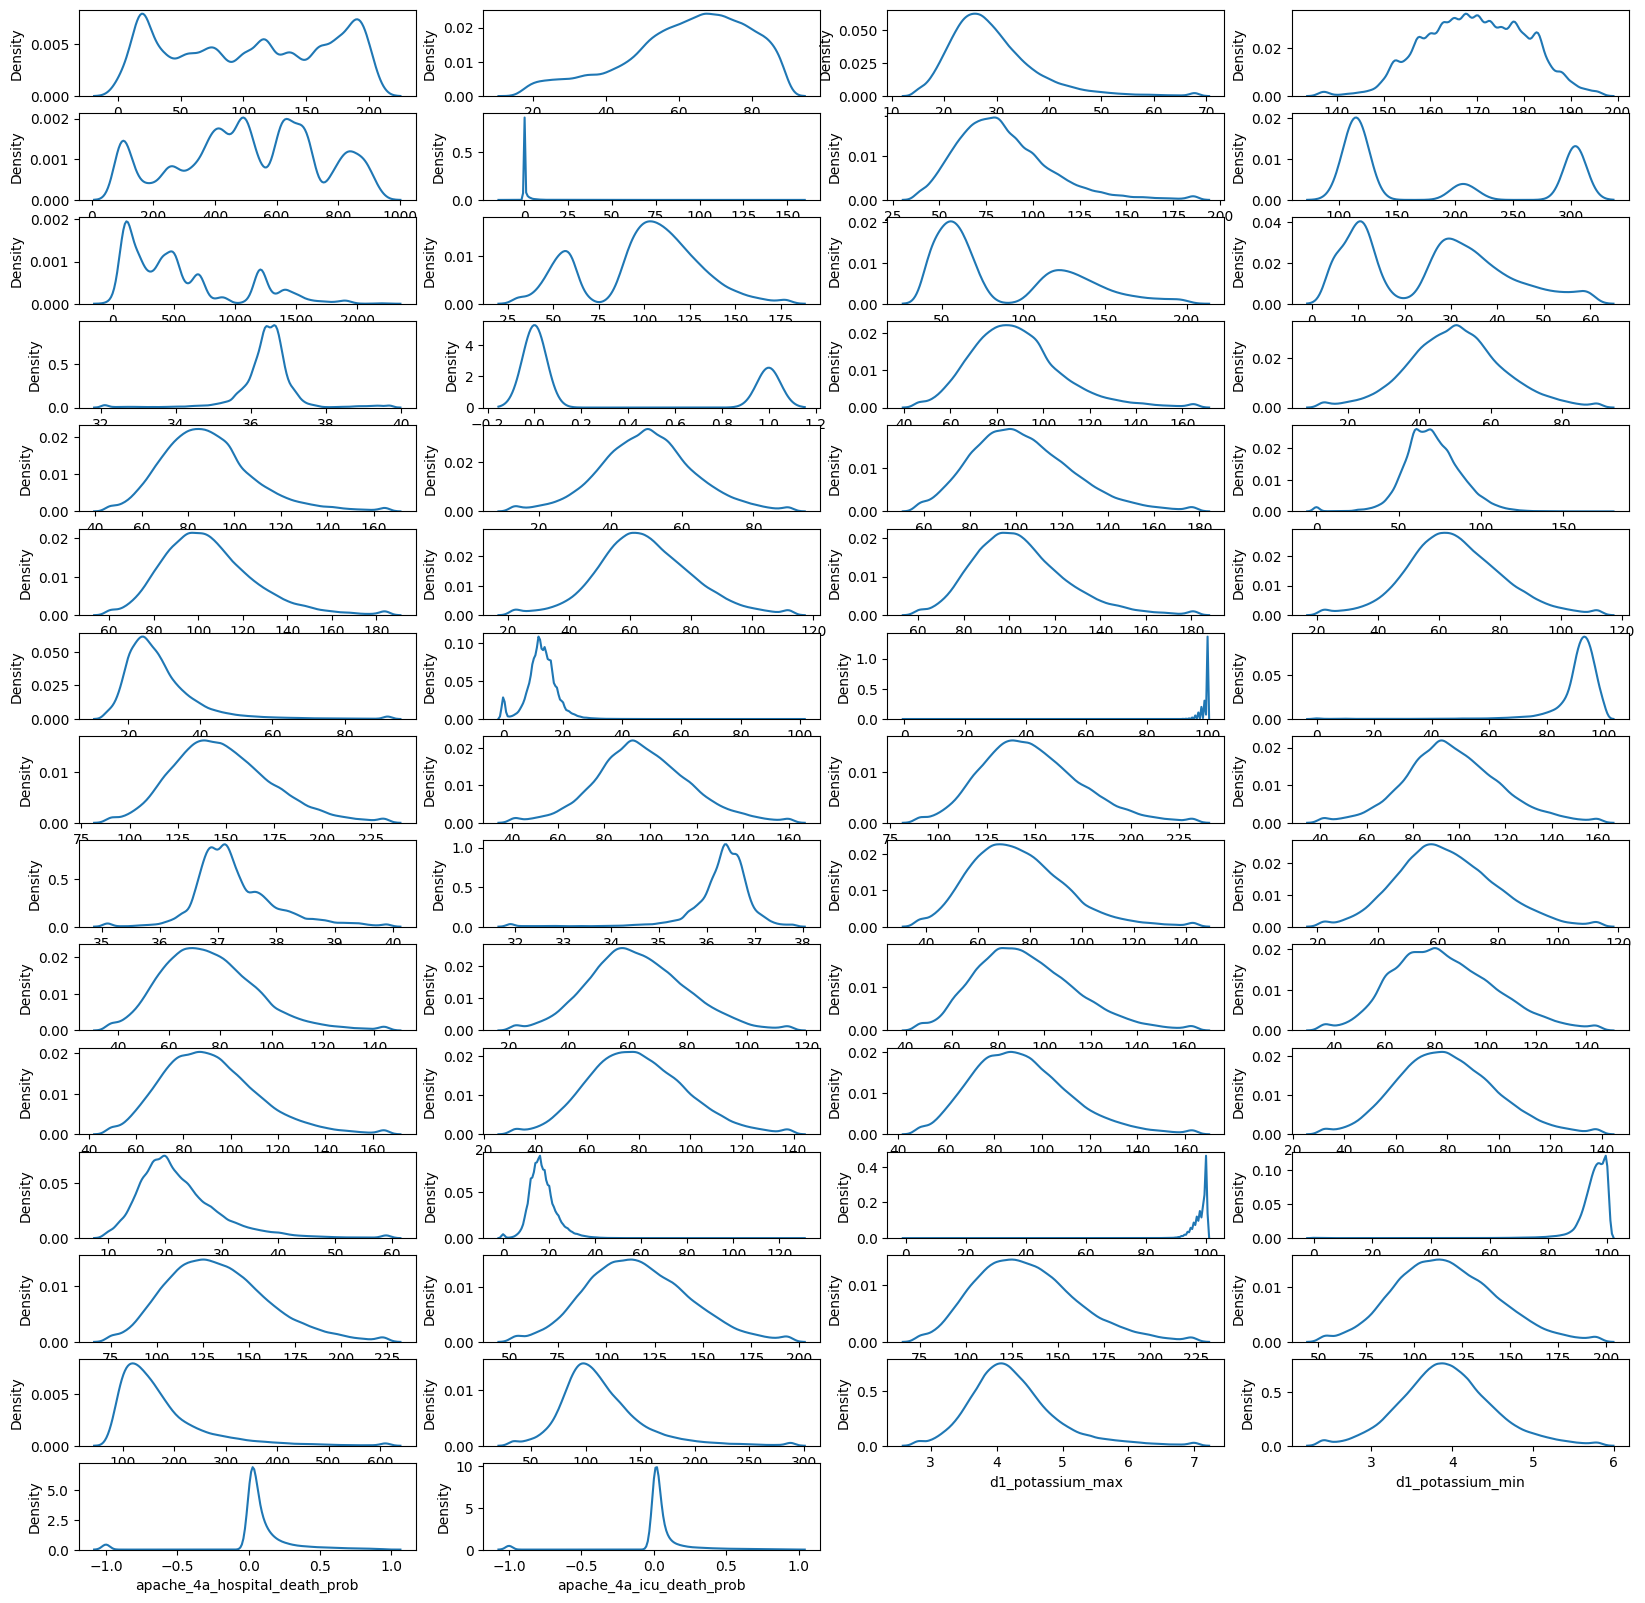

In [ ]:
non_categorical_columns = ['hospital_id', 'age', 'bmi','height',\
       'icu_id', 'pre_icu_los_days', 'weight',\
       'apache_2_diagnosis', 'apache_3j_diagnosis','heart_rate_apache',\
        'map_apache', 'resprate_apache', 'temp_apache',\
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',\
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',\
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',\
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',\
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',\
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',\
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',\
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',\
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',\
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',\
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',\
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',\
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',\
       'd1_potassium_min', 'apache_4a_hospital_death_prob',\
       'apache_4a_icu_death_prob']
i = 1
plt.figure(figsize=(20,20))
for columns in non_categorical_columns:
    plt.subplot(15,4,i)
    sns.kdeplot(x=columns,data=data)
    #plt.title(columns)
    i+=1

# Preprocess the data

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

# кодируем категориальные переменные для применения KNNImputer
le = OrdinalEncoder()
data[categorical_columns] = le.fit_transform(data[categorical_columns])

In [ ]:
le.categories_

[array([0, 1], dtype=int64),
 array(['African American', 'Asian', 'Caucasian', 'Hispanic',
        'Native American', 'Other/Unknown', nan], dtype=object),
 array(['F', 'M', nan], dtype=object),
 array(['admit', 'readmit', 'transfer'], dtype=object),
 array(['CCU-CTICU', 'CSICU', 'CTICU', 'Cardiac ICU', 'MICU',
        'Med-Surg ICU', 'Neuro ICU', 'SICU'], dtype=object),
 array(['Accident & Emergency', 'Floor', 'Operating Room / Recovery',
        'Other Hospital', 'Other ICU', nan], dtype=object),
 array([0, 1], dtype=int64),
 array([ 0.,  1., nan]),
 array([ 1.,  2.,  3.,  4., nan]),
 array([ 1.,  2.,  3.,  4.,  5.,  6., nan]),
 array([ 0.,  1., nan]),
 array([ 1.,  2.,  3.,  4.,  5., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array([ 0.,  1., nan]),
 array(['Cardiovascular', 'Gastrointestinal', '

In [ ]:
from sklearn.model_selection import train_test_split

y = data['hospital_death']
X = data.drop(['hospital_death'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((44939, 81), (44939,), (19260, 81), (19260,))

In [ ]:
imputer = KNNImputer(n_neighbors=10)
imputer.fit(X_train)

KNNImputer(n_neighbors=10)

In [ ]:
X_train_imputed = imputer.transform(X_train)

In [ ]:
X_train_preprocessed = pd.DataFrame(X_train_imputed, columns=X.columns)
X_train_preprocessed = pd.concat([X_train_preprocessed, y_train.reset_index(drop=True).to_frame()], axis=1)
print(X_train_preprocessed.shape)
X_train_preprocessed.head()

(44939, 82)


,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,118.0,69.9,25.719814,0.0,2.0,0.0,162.6,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,1
1,185.0,57.0,20.357278,0.0,0.0,1.0,182.9,0.0,687.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0
2,99.0,71.0,30.558683,0.0,5.0,1.0,175.2,0.0,514.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,21.0,75.0,44.990982,0.0,2.0,1.0,175.2,3.0,504.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0
4,70.0,62.0,16.620499,0.0,0.0,0.0,152.0,0.0,464.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X_train_preprocessed.to_csv('patient-survival-prediction/train_preprocessed.csv')

In [ ]:
X_test_imputed = imputer.transform(X_test)

In [ ]:
X_test_preprocessed = pd.DataFrame(X_test_imputed, columns=X.columns)
X_test_preprocessed = pd.concat([X_test_preprocessed, y_test.reset_index(drop=True).to_frame()], axis=1)
print(X_test_preprocessed.shape)
X_test_preprocessed.head()

(19260, 82)


,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,188.0,69.0,29.605976,0.0,2.0,0.0,165.1,0.0,840.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,10.0,68.0,27.986953,0.0,2.0,1.0,185.4,0.0,428.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0
2,176.0,55.0,32.641470,1.0,2.0,0.0,162.6,2.0,611.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,19.0,53.0,19.444444,0.0,2.0,1.0,180.0,3.0,653.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,128.0,74.0,16.508909,0.0,2.0,0.0,165.1,1.0,377.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0


In [ ]:
X_test_preprocessed.to_csv('patient-survival-prediction/test_preprocessed.csv')

# Baseline

In [ ]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Existanze54/sirius-neural-networks-2024/main/Datasets/patient-survival-prediction/train_preprocessed.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Existanze54/sirius-neural-networks-2024/main/Datasets/patient-survival-prediction/test_preprocessed.csv')

In [ ]:
X_train = train_df.drop("hospital_death", axis=1)
y_train = train_df['hospital_death']

In [ ]:
X_test = test_df.drop("hospital_death", axis=1)
y_test = test_df['hospital_death']

Константный прогноз

In [ ]:
np.count_nonzero(y_train == 0) / len(y_train)

0.9132379447695765

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [ ]:
dummy_pred_train = dummy_clf.predict(X_train)
dummy_pred_test = dummy_clf.predict(X_test)

In [ ]:
dummy_train_auc = roc_auc_score(y_train, dummy_pred_train)
dummy_train_acc = accuracy_score(y_train, dummy_pred_train)

print("Dummy clf train metrics: AUC={}, acc={}".format(dummy_train_auc, dummy_train_acc))

Dummy clf train metrics: AUC=0.5, acc=0.9132379447695765


In [ ]:
dummy_test_auc = roc_auc_score(y_test, dummy_pred_test)
dummy_test_acc = accuracy_score(y_test, dummy_pred_test)

print("Dummy clf test metrics: AUC={}, acc={}".format(dummy_test_auc, dummy_test_acc))

Dummy clf test metrics: AUC=0.5, acc=0.914797507788162


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
clf = RandomForestClassifier(class_weight="balanced")

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 24.2 s, sys: 62.2 ms, total: 24.2 s
Wall time: 28 s


RandomForestClassifier(class_weight='balanced')

In [ ]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [ ]:
train_auc = roc_auc_score(y_train, pred_train)
train_acc = accuracy_score(y_train, pred_train)

print("RFC train metrics: AUC={}, acc={}".format(train_auc, train_acc))

RFC train metrics: AUC=0.9997435239805078, acc=0.9999554952268631


In [ ]:
test_auc = roc_auc_score(y_test, pred_test)
test_acc = accuracy_score(y_test, pred_test)

print("RFC test metrics: AUC={}, acc={}".format(test_auc, test_acc))

RFC test metrics: AUC=0.5713860815662168, acc=0.9215472481827622
